In [434]:
import pandas as pd
import matplotlib as plt
import chardet
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from pandas.api.types import is_string_dtype

from sklearn.pipeline import  Pipeline
from sklearn.compose import ColumnTransformer


In [435]:
! pip install pipeline
!

In [436]:
with open("patient_dataset.csv", "rb") as f:
    raw_data = f.read()

result = chardet.detect(raw_data)
encoding = result['encoding']
print(f"Detected encoding: {encoding}")


Detected encoding: ascii


# Data Preprocessing

## Null values


In [437]:
df = pd.read_csv('patient_dataset.csv', encoding= 'ascii')
df.head(10)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker
5,63,1.0,3,18,154,107,0,103.0,67.0,102.0,22.373849,1.062411,0,0,Rural,Non-Smoker
6,48,0.0,3,143,275,165,0,248.0,NaN,136.0,27.900710,1.073761,1,1,Rural,Non-Smoker
7,37,1.0,4,263,201,201,0,186.0,21.0,180.0,35.663404,0.151236,0,0,Urban,Smoker
8,20,0.0,3,113,127,139,1,123.0,NaN,120.0,26.529148,1.910278,1,0,Urban,Non-Smoker
9,77,1.0,1,138,217,201,0,199.0,100.0,132.0,18.393599,1.825306,1,0,Rural,Non-Smoker


In [438]:
df.count().sum()

np.int64(93282)

In [439]:
df.isna().count()

age                  6000
gender               6000
chest_pain_type      6000
blood_pressure       6000
cholesterol          6000
max_heart_rate       6000
exercise_angina      6000
plasma_glucose       6000
skin_thickness       6000
insulin              6000
bmi                  6000
diabetes_pedigree    6000
hypertension         6000
heart_disease        6000
residence_type       6000
smoking_status       6000
dtype: int64

In [440]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f"{col} has {null_count} null(s)")


age has 0 null(s)
gender has 472 null(s)
chest_pain_type has 0 null(s)
blood_pressure has 0 null(s)
cholesterol has 0 null(s)
max_heart_rate has 0 null(s)
exercise_angina has 0 null(s)
plasma_glucose has 609 null(s)
skin_thickness has 614 null(s)
insulin has 568 null(s)
bmi has 0 null(s)
diabetes_pedigree has 0 null(s)
hypertension has 0 null(s)
heart_disease has 0 null(s)
residence_type has 455 null(s)
smoking_status has 0 null(s)


In [441]:
#df.dropna(axis=1, inplace = True)

## Dummy variables

In [442]:
dummies=pd.get_dummies(df, prefix= 'dum', dtype=int)
dummies

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Urban,dum_Non-Smoker,dum_Smoker,dum_Unknown
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,0,1,0,1,0
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,0,1,0,0,1
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,1,0,1,0,0
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,1,0,0,1,0
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,1,0,1,0,0
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,0,1,1,0,0
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,0,1,1,0,0
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,0,1,1,0,0


In [443]:
dummies

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Urban,dum_Non-Smoker,dum_Smoker,dum_Unknown
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,0,1,0,1,0
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,0,1,0,0,1
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,1,0,1,0,0
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,1,0,0,1,0
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,1,0,1,0,0
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,0,1,1,0,0
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,0,1,1,0,0
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,0,1,1,0,0


In [444]:
dummies.drop(['dum_Unknown','dum_Non-Smoker','dum_Urban'],axis=1,inplace=True)

In [445]:
df= dummies
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Smoker
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,0,1
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,0,0
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,1,0
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,1,1
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,1,0
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,0,0
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,0,0
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,0,0


#### Impute Nulls with median

In [446]:
for col in df:
    df[col] = df[col].fillna(df[col].median())

In [447]:
len(df)

6000

## imposible to have blood  pressure of 15 or less

In [448]:
df_cleaned = df[df['blood_pressure'] >= 25]
df = df_cleaned

## Outlier and Descr. Stats.

Column: age
  Q1: 36.0
  Q3: 72.0
  IQR: 36.0

 Number of outliers: 5771



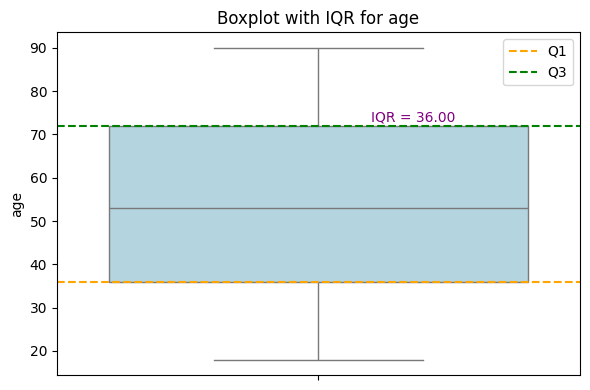

Column: gender
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0

 Number of outliers: 5771



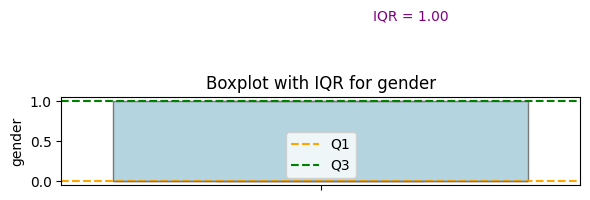

Column: chest_pain_type
  Q1: 2.0
  Q3: 4.0
  IQR: 2.0

 Number of outliers: 5771



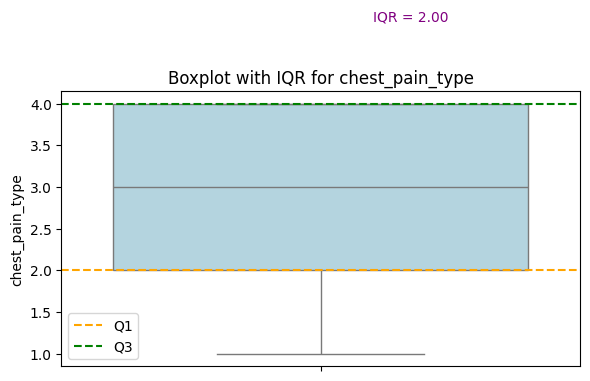

Column: blood_pressure
  Q1: 112.0
  Q3: 162.0
  IQR: 50.0

 Number of outliers: 5431



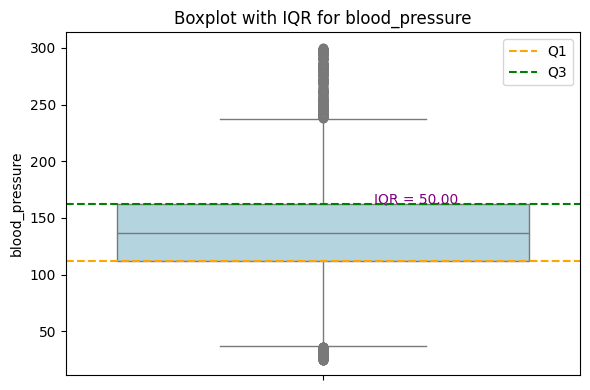

Column: cholesterol
  Q1: 164.0
  Q3: 257.0
  IQR: 93.0

 Number of outliers: 5771



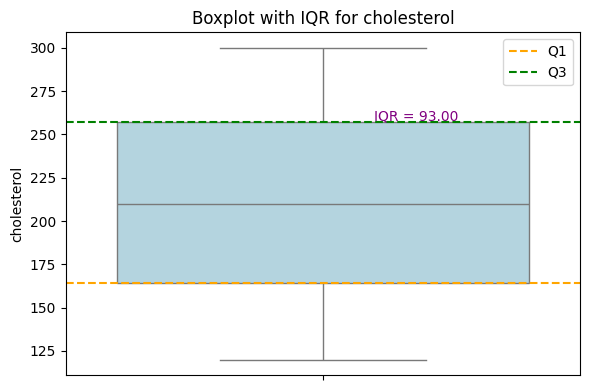

Column: max_heart_rate
  Q1: 108.0
  Q3: 183.0
  IQR: 75.0

 Number of outliers: 5771



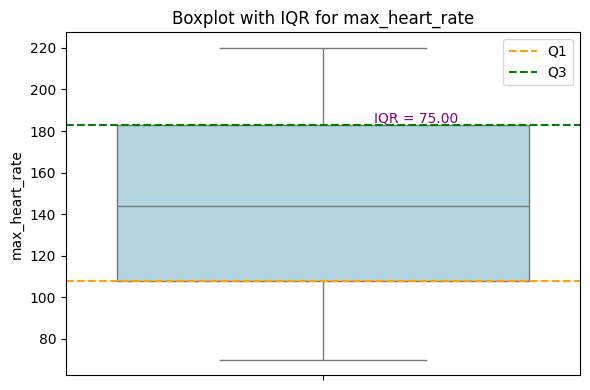

Column: exercise_angina
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0

 Number of outliers: 5771



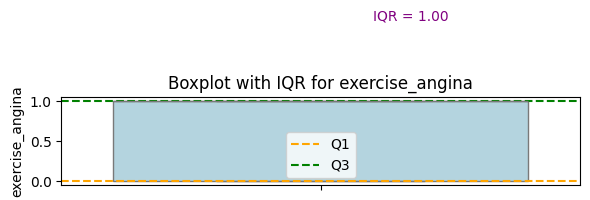

Column: plasma_glucose
  Q1: 121.0
  Q3: 202.0
  IQR: 81.0

 Number of outliers: 5771



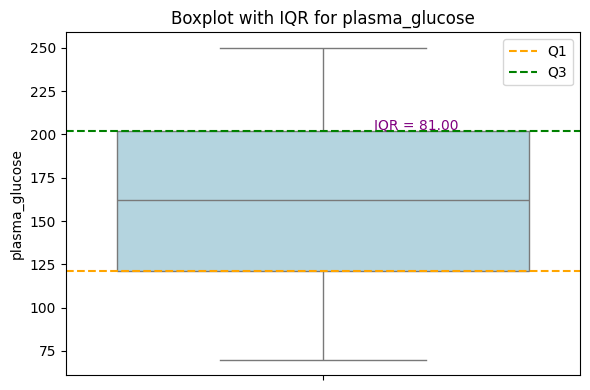

Column: skin_thickness
  Q1: 42.0
  Q3: 78.0
  IQR: 36.0

 Number of outliers: 5771



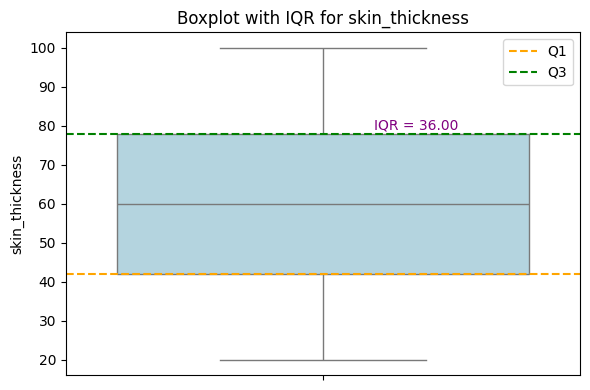

Column: insulin
  Q1: 107.0
  Q3: 153.0
  IQR: 46.0

 Number of outliers: 5771



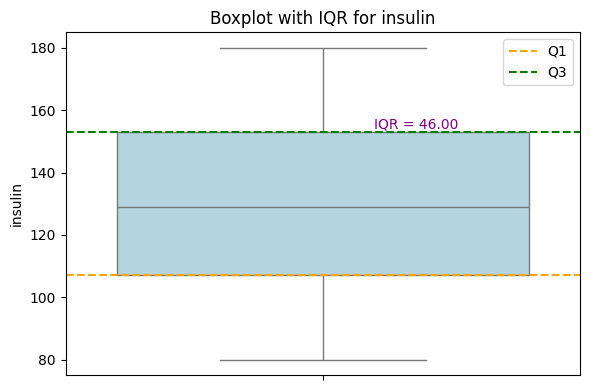

Column: bmi
  Q1: 19.82178303724663
  Q3: 39.95561707356315
  IQR: 20.133834036316518

 Number of outliers: 5771



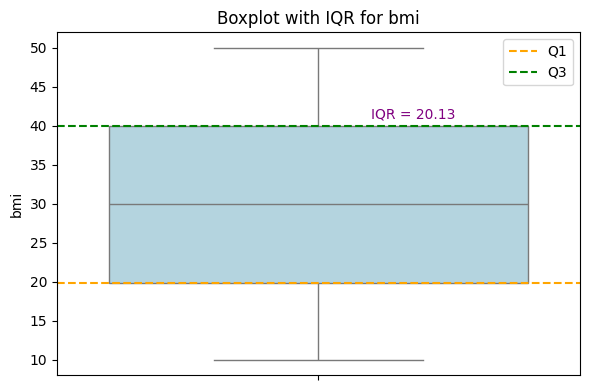

Column: diabetes_pedigree
  Q1: 0.6834693253912556
  Q3: 1.8945665790994857
  IQR: 1.21109725370823

 Number of outliers: 5771



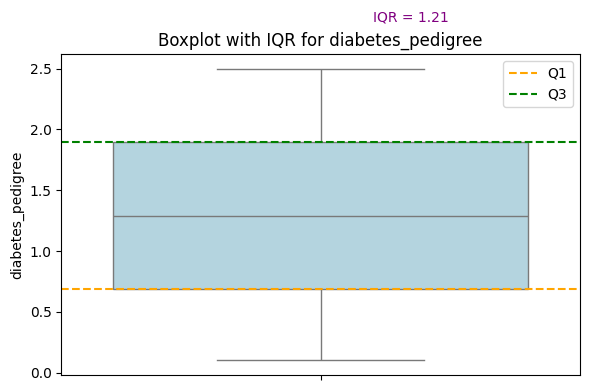

Column: hypertension
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0

 Number of outliers: 5771



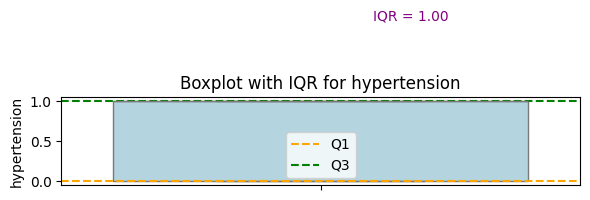

Column: heart_disease
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0

 Number of outliers: 5771



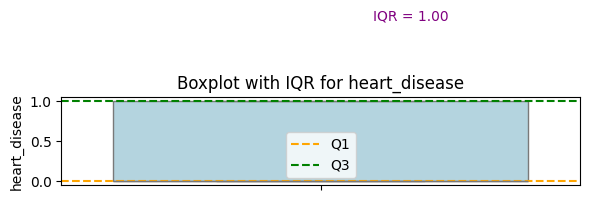

Column: dum_Rural
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0

 Number of outliers: 5771



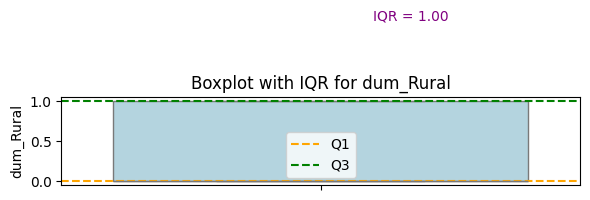

Column: dum_Smoker
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0

 Number of outliers: 5771



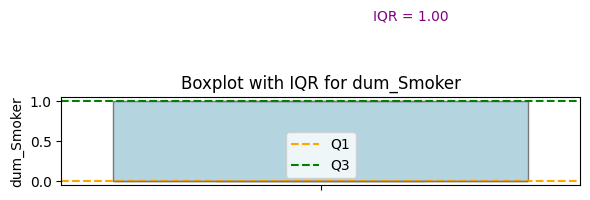

In [449]:
import matplotlib.pyplot as plt
import seaborn as sns


# Loop through each numeric column
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    
    outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f"Column: {col}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}\n")
    print(f" Number of outliers: {len(outliers)}\n")

    # Plot boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightblue')

    # Add IQR reference lines
    plt.axhline(Q1, color='orange', linestyle='--', label='Q1')
    plt.axhline(Q3, color='green', linestyle='--', label='Q3')

    # Add text for IQR
    plt.text(0.1, Q3 + 1, f'IQR = {IQR:.2f}', color='purple')

    plt.title(f'Boxplot with IQR for {col}')
    plt.legend()
    plt.tight_layout()
    plt.show()


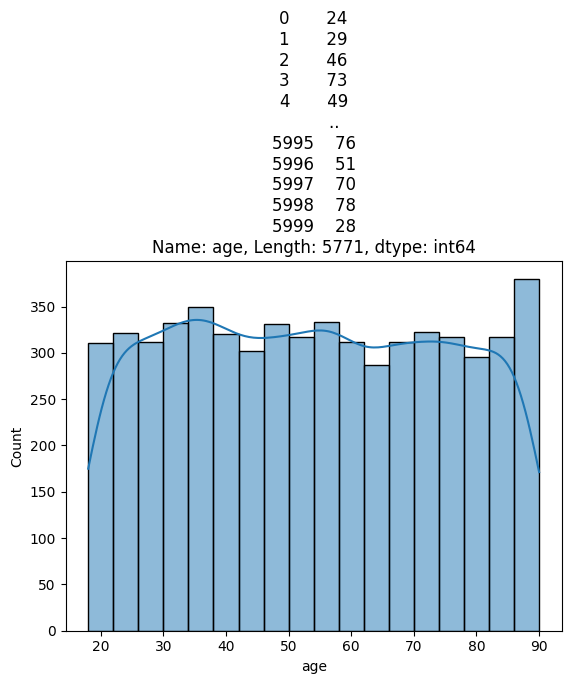

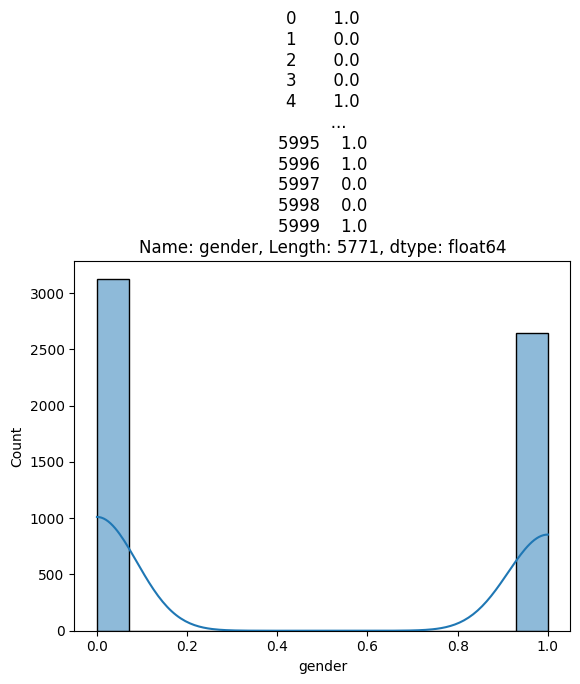

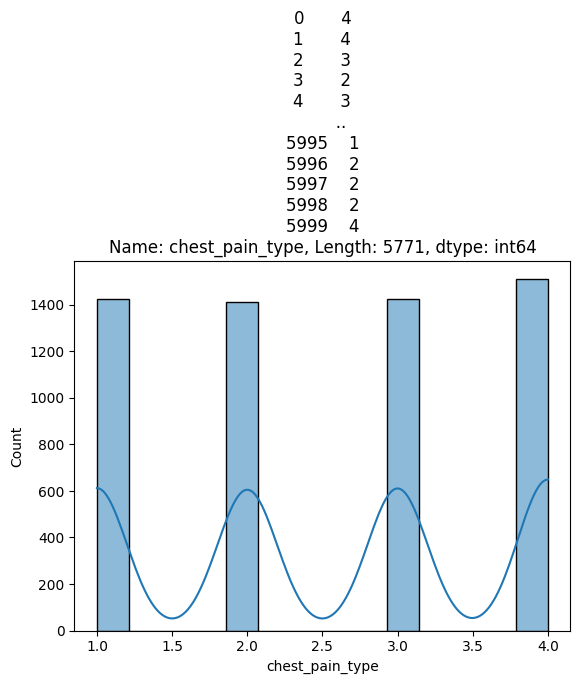

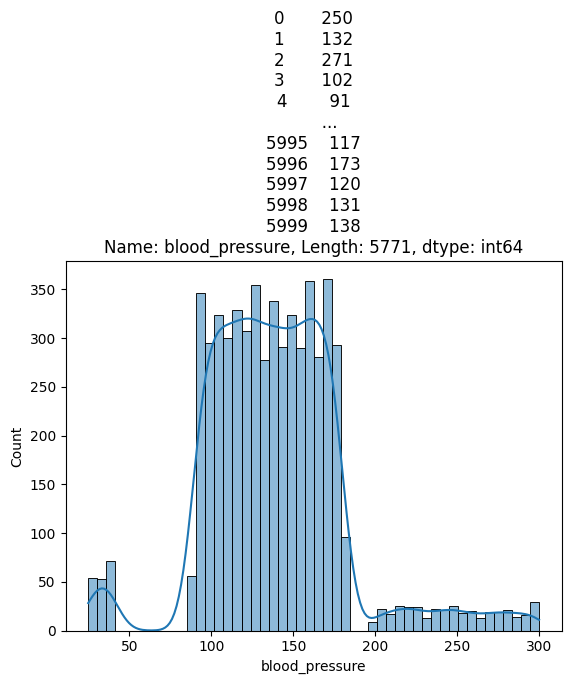

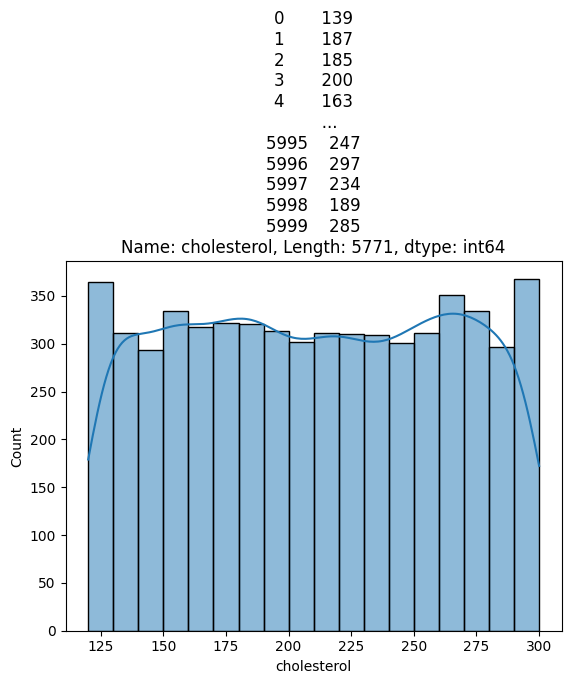

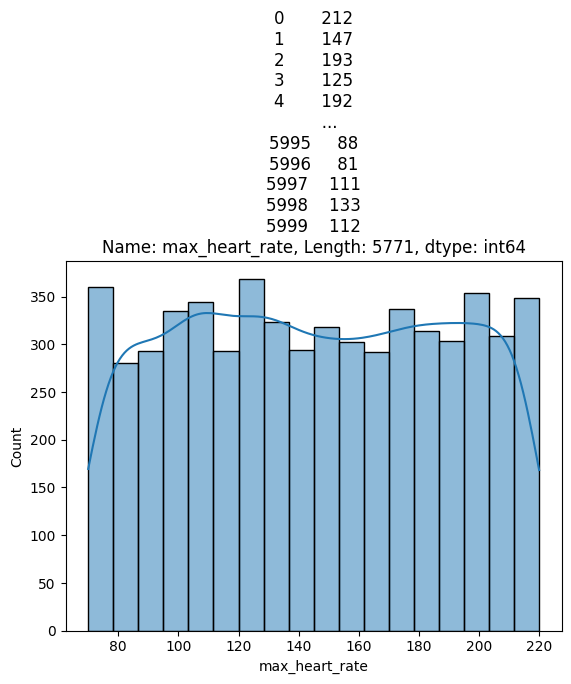

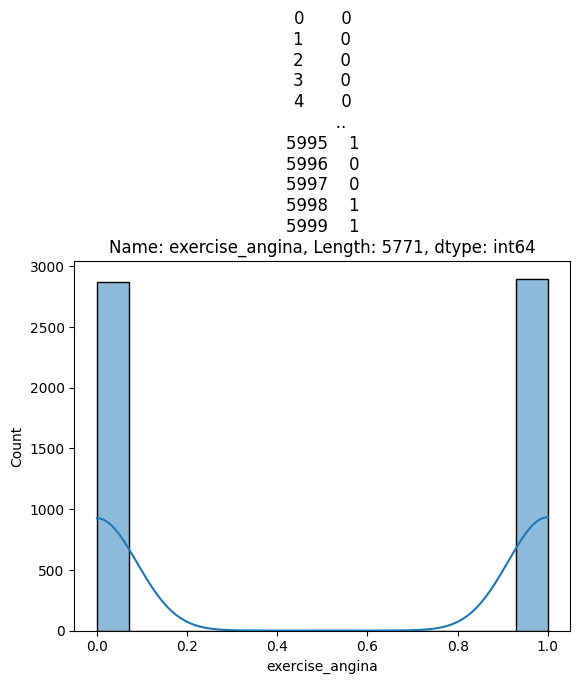

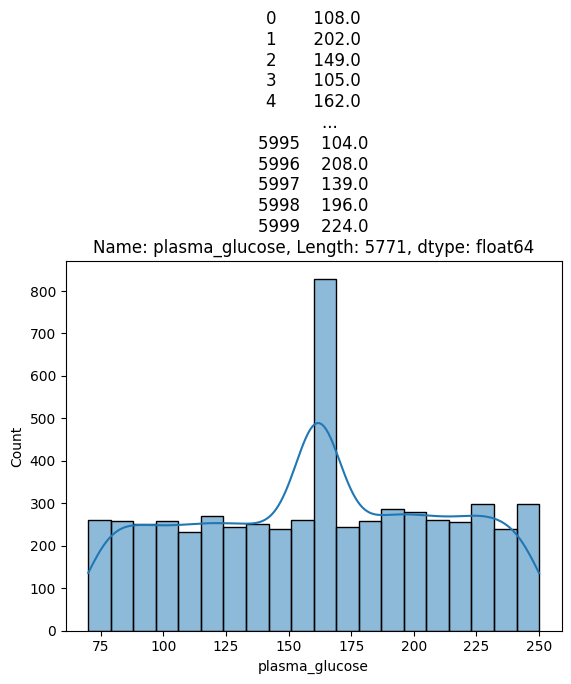

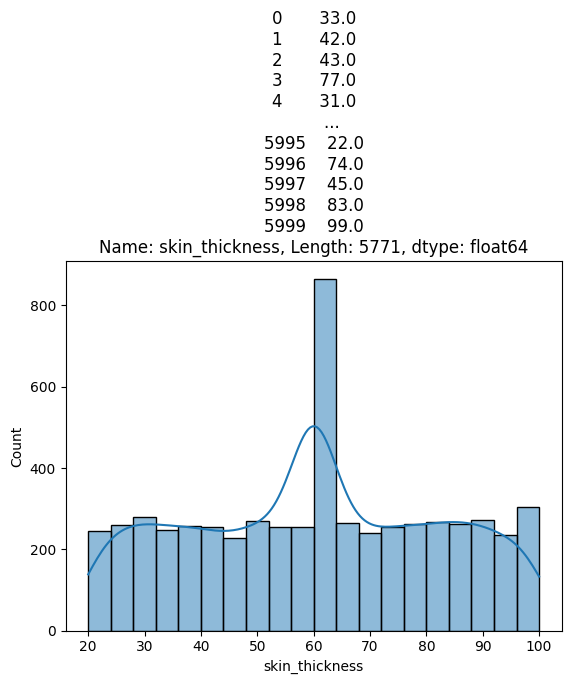

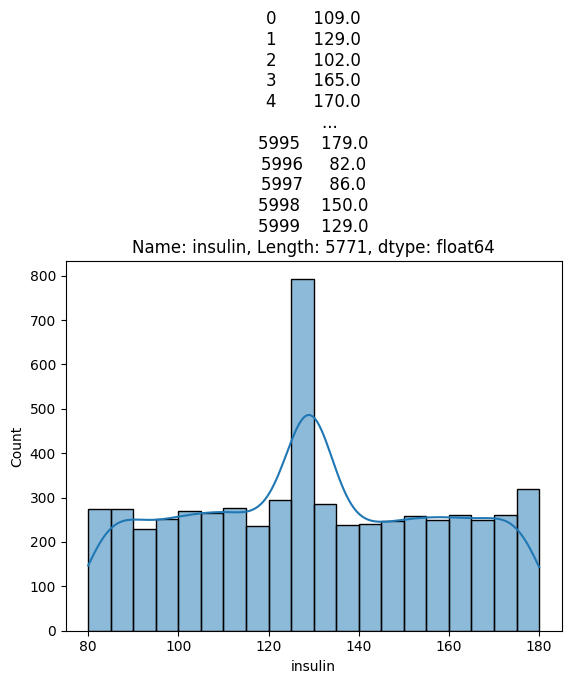

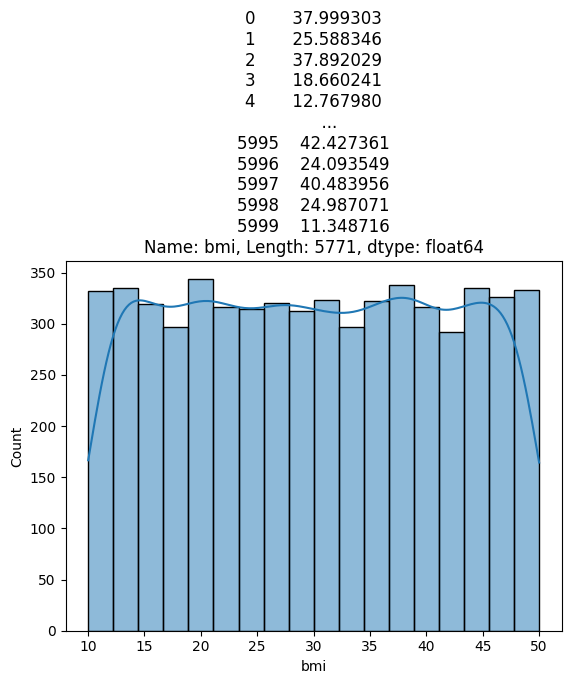

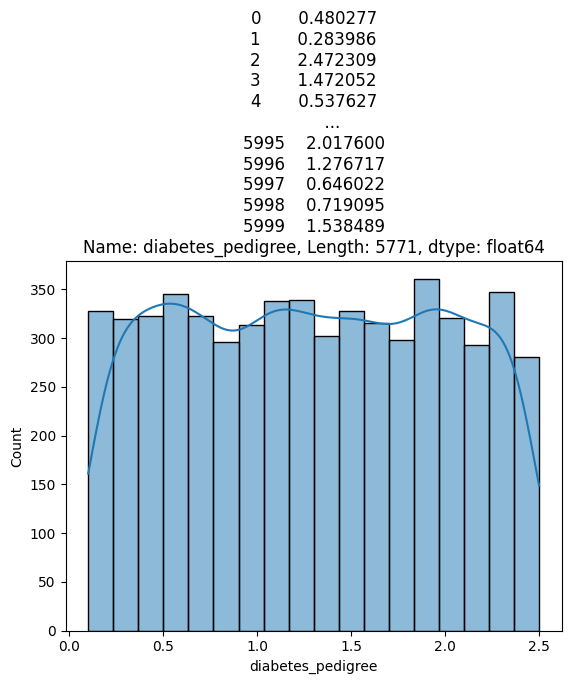

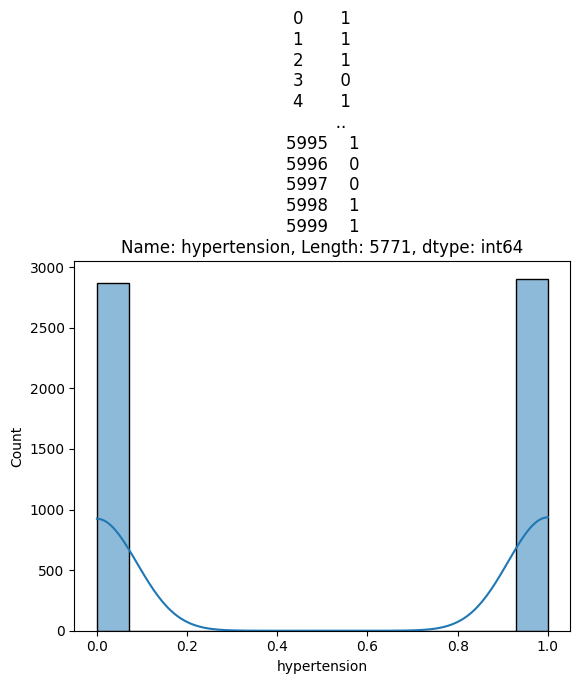

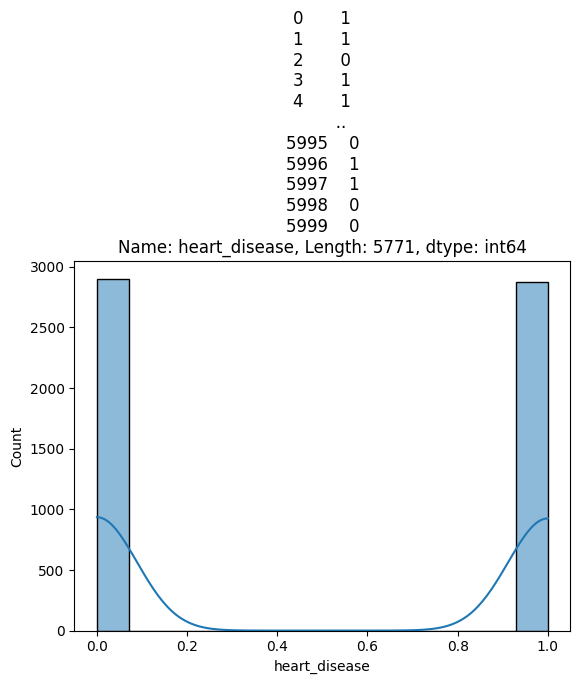

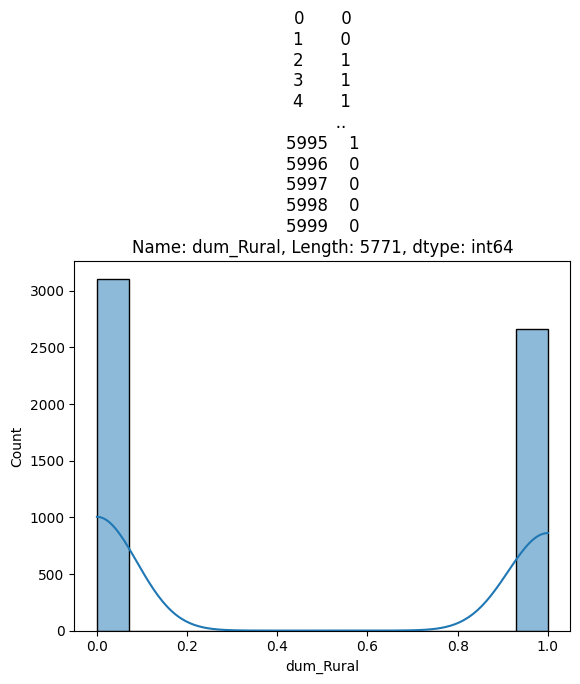

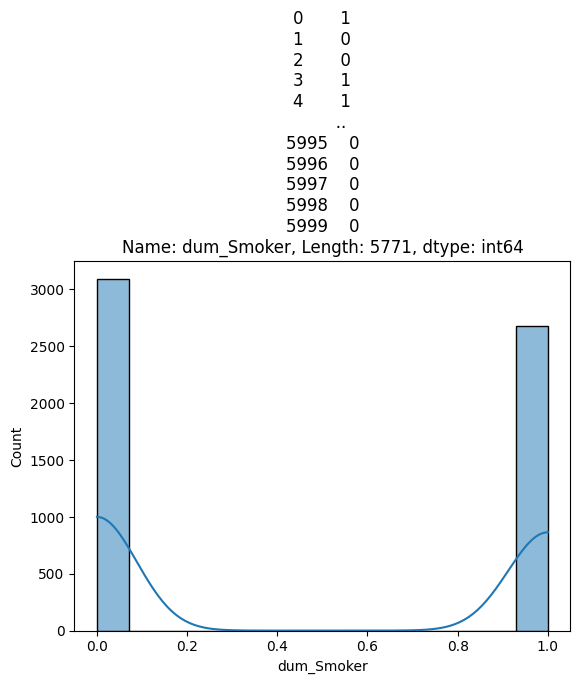

In [450]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of the column
for col in df:
    sns.histplot(df[col], kde=True)
    plt.title(df[col])
    plt.show()


In [451]:
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Smoker
count,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000
mean,53.652227,0.457980,2.523479,139.130827,209.850806,145.064114,0.502166,161.239647,59.927222,129.671287,29.960035,1.290473,0.503206,0.497314,0.461618,0.463698
std,21.003833,0.498274,1.125994,42.500187,52.824021,43.625093,0.500039,49.699941,22.030731,27.836697,11.628983,0.690378,0.500033,0.500036,0.498568,0.498724
min,18.000000,0.000000,1.000000,25.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.006670,0.100068,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,2.000000,112.000000,164.000000,108.000000,0.000000,121.000000,42.000000,107.000000,19.821783,0.683469,0.000000,0.000000,0.000000,0.000000
50%,53.000000,0.000000,3.000000,137.000000,210.000000,144.000000,1.000000,162.000000,60.000000,129.000000,29.979129,1.284086,1.000000,0.000000,0.000000,0.000000
75%,72.000000,1.000000,4.000000,162.000000,257.000000,183.000000,1.000000,202.000000,78.000000,153.000000,39.955617,1.894567,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,4.000000,300.000000,300.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.999449,2.499635,1.000000,1.000000,1.000000,1.000000


In [452]:
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Smoker
count,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000
mean,53.652227,0.457980,2.523479,139.130827,209.850806,145.064114,0.502166,161.239647,59.927222,129.671287,29.960035,1.290473,0.503206,0.497314,0.461618,0.463698
std,21.003833,0.498274,1.125994,42.500187,52.824021,43.625093,0.500039,49.699941,22.030731,27.836697,11.628983,0.690378,0.500033,0.500036,0.498568,0.498724
min,18.000000,0.000000,1.000000,25.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.006670,0.100068,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,2.000000,112.000000,164.000000,108.000000,0.000000,121.000000,42.000000,107.000000,19.821783,0.683469,0.000000,0.000000,0.000000,0.000000
50%,53.000000,0.000000,3.000000,137.000000,210.000000,144.000000,1.000000,162.000000,60.000000,129.000000,29.979129,1.284086,1.000000,0.000000,0.000000,0.000000
75%,72.000000,1.000000,4.000000,162.000000,257.000000,183.000000,1.000000,202.000000,78.000000,153.000000,39.955617,1.894567,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,4.000000,300.000000,300.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.999449,2.499635,1.000000,1.000000,1.000000,1.000000


## Robust scaler

In [453]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Assuming 'df' is your DataFrame

# Identify numeric columns (excluding binary/quaternary columns)
numeric_columns = df.select_dtypes(include='number').columns

# List the binary or categorical columns you want to exclude (adjust this as needed)
exclude_columns = ['gender', 'hypertension', 'exercise_angina', 'dum_Rural', 'dum_Smoker','chest_pain_type']  # Example columns

# Filter out the columns you want to exclude
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the data (scale the selected numeric columns)
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows to check the result
print(df.head())



        age  gender  chest_pain_type  blood_pressure  cholesterol  \
0 -0.805556     1.0                4            2.26    -0.763441   
1 -0.666667     0.0                4           -0.10    -0.247312   
2 -0.194444     0.0                3            2.68    -0.268817   
3  0.555556     0.0                2           -0.70    -0.107527   
4 -0.111111     1.0                3           -0.92    -0.505376   

   max_heart_rate  exercise_angina  plasma_glucose  skin_thickness   insulin  \
0        0.906667                0       -0.666667       -0.750000 -0.434783   
1        0.040000                0        0.493827       -0.500000  0.000000   
2        0.653333                0       -0.160494       -0.472222 -0.586957   
3       -0.253333                0       -0.703704        0.472222  0.782609   
4        0.640000                0        0.000000       -0.805556  0.891304   

        bmi  diabetes_pedigree  hypertension  heart_disease  dum_Rural  \
0  0.398343          -0.663702

/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_15281/2861991380.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


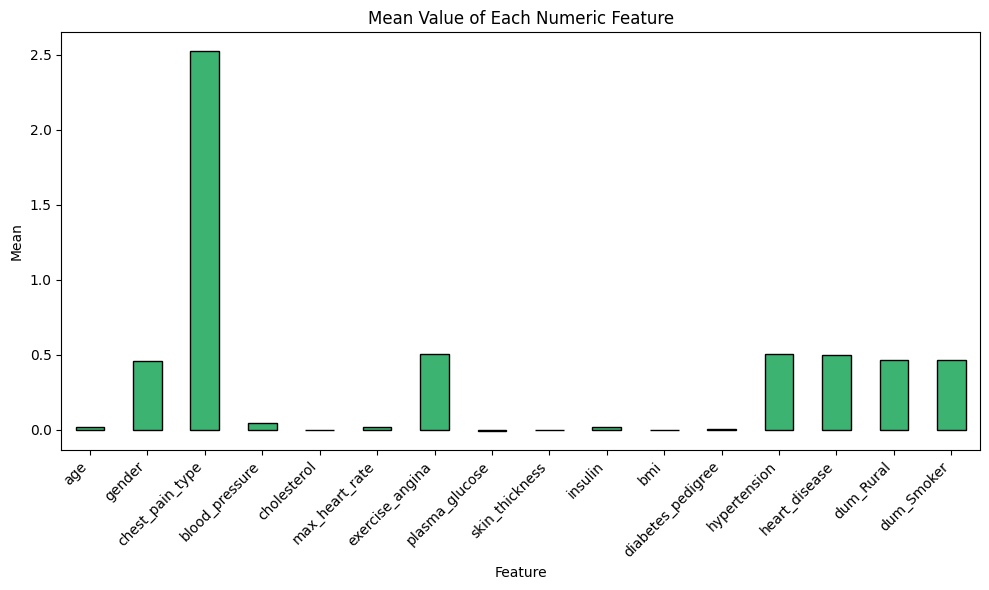

In [454]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute mean of each column
col_means = numeric_cols.mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
col_means.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Mean Value of Each Numeric Feature')
plt.xlabel('Feature')
plt.ylabel('Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [455]:
df


,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Smoker
0,-0.805556,1.0,4,2.26,-0.763441,0.906667,0,-0.666667,-0.750000,-0.434783,0.398343,-0.663702,1,1.0,0,1
1,-0.666667,0.0,4,-0.10,-0.247312,0.040000,0,0.493827,-0.500000,0.000000,-0.218080,-0.825780,1,1.0,0,0
2,-0.194444,0.0,3,2.68,-0.268817,0.653333,0,-0.160494,-0.472222,-0.586957,0.393015,0.981113,1,0.0,1,0
3,0.555556,0.0,2,-0.70,-0.107527,-0.253333,0,-0.703704,0.472222,0.782609,-0.562182,0.155204,0,1.0,1,1
4,-0.111111,1.0,3,-0.92,-0.505376,0.640000,0,0.000000,-0.805556,0.891304,-0.854837,-0.616350,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.638889,1.0,1,-0.40,0.397849,-0.746667,1,-0.716049,-1.055556,1.086957,0.618274,0.605661,1,0.0,1,0
5996,-0.055556,1.0,2,0.72,0.935484,-0.840000,0,0.567901,0.388889,-1.021739,-0.292323,-0.006084,0,1.0,0,0
5997,0.472222,0.0,2,-0.34,0.258065,-0.440000,0,-0.283951,-0.416667,-0.934783,0.521750,-0.526848,0,1.0,0,0
5998,0.694444,0.0,2,-0.12,-0.225806,-0.146667,1,0.419753,0.638889,0.456522,-0.247944,-0.466511,1,0.0,0,0


## create pipeline for models to not get mixed up

In [456]:
LOGpipeline= Pipeline([
    ('classifier', LogisticRegression(random_state=42))
])



In [457]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
#divide into quartiles
df['cholesterol_risk_level'] = pd.qcut(df['cholesterol'], q=3, labels=['low','medium', 'high'])

# Encode 'cholesterol_risk_level' into numeric categories
encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df['cholesterol_risk_level'] = encoder.fit_transform(df[['cholesterol_risk_level']])

# Features (excluding the target variable)
X = df.drop(['cholesterol_risk_level','cholesterol'], axis=1)

# Target variable (only 'cholesterol_risk_level')
y = df['cholesterol_risk_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_15281/3695960076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cholesterol_risk_level'] = pd.qcut(df['cholesterol'], q=3, labels=['low','medium', 'high'])
/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_15281/3695960076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cholesterol_risk_level'] = encoder.fit_transform(df[['cholesterol_risk_level']])


### Logistic regression


In [458]:

# Model
LOGpipeline.fit(X_train, y_train)

# Predict
y_pred = LOGpipeline.predict(X_test)

# Show predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
# Basic metrics with multiclass averaging
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Confusion matrix and full report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.3302540415704388
Precision (macro): 0.33330245719741997
Recall (macro): 0.3320600086206153
F1 Score (macro): 0.3264019932605826

Confusion Matrix:
[[244 131 182]
 [268 143 175]
 [261 143 185]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.32      0.44      0.37       557
         1.0       0.34      0.24      0.29       586
         2.0       0.34      0.31      0.33       589

    accuracy                           0.33      1732
   macro avg       0.33      0.33      0.33      1732
weighted avg       0.33      0.33      0.33      1732



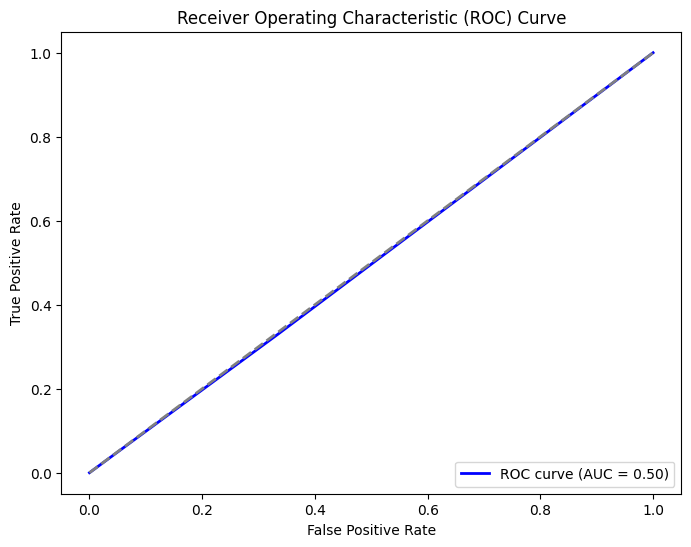

In [459]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels
y_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 0, 1, 2 for low, medium, high
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [460]:
roc_auc

np.float64(0.497690531177829)

## Random forest

In [461]:
X.shape

(5771, 15)

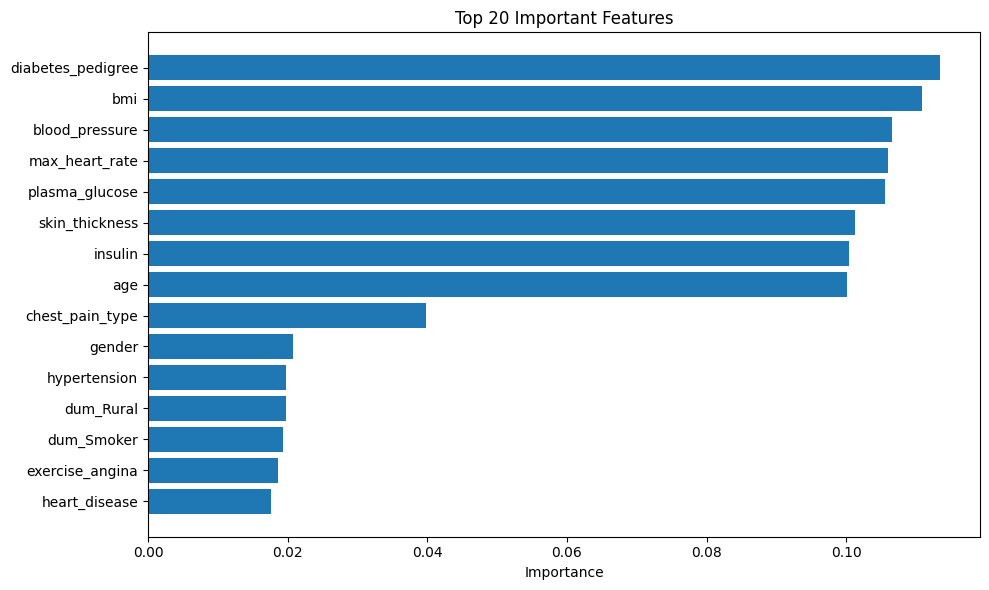

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Create the pipeline with the RandomForestClassifier
Forpipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=0))
])

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the pipeline with training data
Forpipeline.fit(X_train, y_train)

# Get feature importances
importances = Forpipeline.named_steps['model'].feature_importances_

# Use the column names of X to map them to feature importance
feature_names = X.columns  # or use X_train.columns if you prefer

# Create a DataFrame for better control
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Display top N (change N to show more or all)
top_n = 20  # or use len(feat_imp) to show all
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'].head(top_n)[::-1], feat_imp['Importance'].head(top_n)[::-1])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Important Features')
plt.tight_layout()
plt.show()



## model evaluation

In [463]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Fit the model if not already done
Forpipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = Forpipeline.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 3. Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# 4. ROC-AUC (only for binary classification)
if len(y_test.unique()) == 2:  # Check if it's binary classification
    y_prob = Forpipeline.predict_proba(X_test)[:, 1]  # Probability for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC: {roc_auc:.4f}")

# 5. Cross-validation (optional)
cv_scores = cross_val_score(Forpipeline, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Accuracy: 0.3395
Confusion Matrix:
 [[229 162 166]
 [242 185 159]
 [261 154 174]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.31      0.41      0.36       557
         1.0       0.37      0.32      0.34       586
         2.0       0.35      0.30      0.32       589

    accuracy                           0.34      1732
   macro avg       0.34      0.34      0.34      1732
weighted avg       0.34      0.34      0.34      1732

Cross-validated Accuracy: 0.3308 (+/- 0.0155)
